In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect("../db/traffic.db")


In [2]:
# Load data from the rides table
df = pd.read_sql("SELECT * FROM rides", conn)
df.head()


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount
0,2023-01-01 00:32:10,2023-01-01 00:40:36,0.97,161,141,9.3
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.10,43,237,7.9
2,2023-01-01 00:25:04,2023-01-01 00:37:49,2.51,48,238,14.9
3,2023-01-01 00:03:48,2023-01-01 00:13:25,1.90,138,7,12.1
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.43,107,79,11.4


In [3]:
# Convert pickup/dropoff columns to datetime
df["pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["hour"] = df["pickup_datetime"].dt.hour


C:\Users\Lenovo India\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128336 (\N{CLOCK FACE ONE OCLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


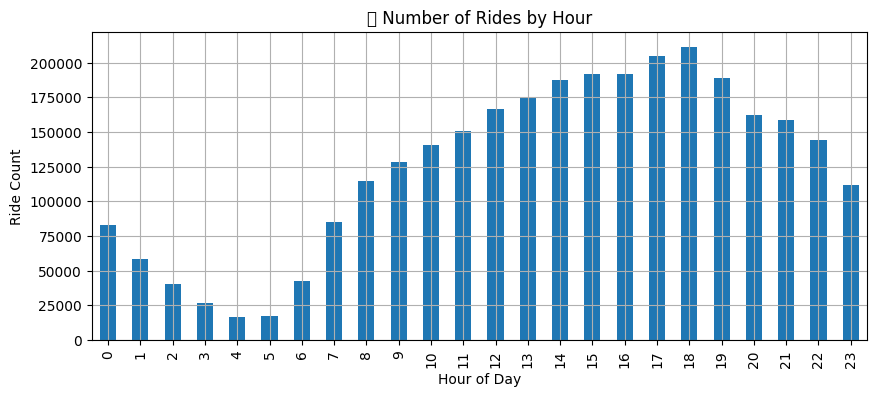

In [4]:
df["hour"].value_counts().sort_index().plot(kind="bar", figsize=(10, 4))
plt.title("🕐 Number of Rides by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Count")
plt.grid(True)
plt.show()


C:\Users\Lenovo India\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128661 (\N{TAXI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


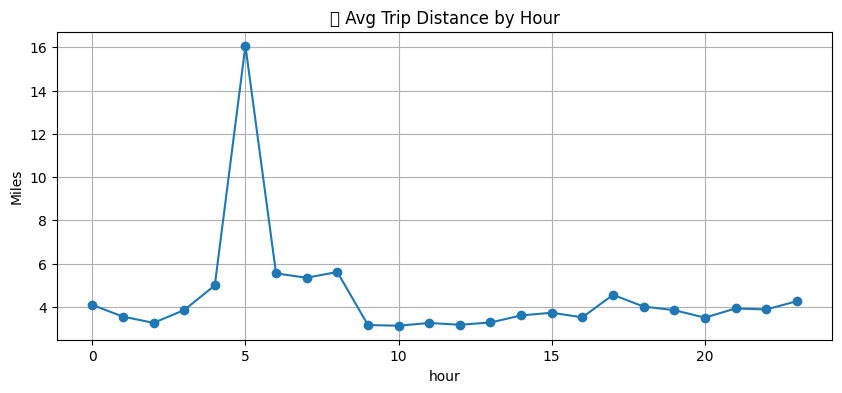

In [5]:
df.groupby("hour")["trip_distance"].mean().plot(kind="line", marker="o", figsize=(10, 4))
plt.title("🚕 Avg Trip Distance by Hour")
plt.ylabel("Miles")
plt.grid(True)
plt.show()


C:\Users\Lenovo India\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


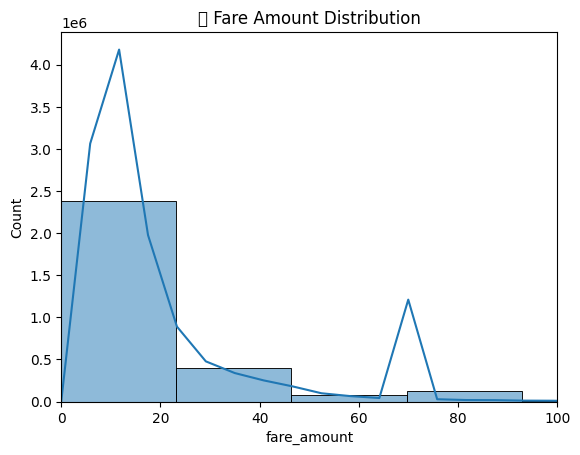

In [6]:
sns.histplot(df["fare_amount"], bins=50, kde=True)
plt.title("💰 Fare Amount Distribution")
plt.xlim(0, 100)
plt.show()


C:\Users\Lenovo India\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


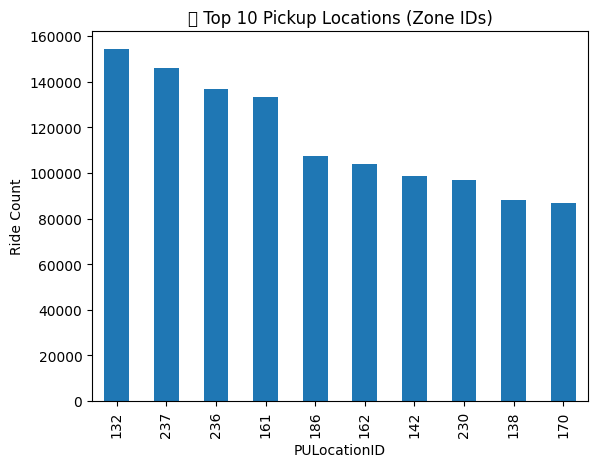

In [7]:
df["PULocationID"].value_counts().head(10).plot(kind="bar")
plt.title("📍 Top 10 Pickup Locations (Zone IDs)")
plt.xlabel("PULocationID")
plt.ylabel("Ride Count")
plt.show()


In [8]:
df[["hour", "trip_distance", "PULocationID", "fare_amount"]].to_csv("../data/processed/rides_for_ml.csv", index=False)
